In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/electric-power-consumption-data-set")

print("Path to dataset files:", path)

100%|██████████| 19.4M/19.4M [00:00<00:00, 186MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/electric-power-consumption-data-set/versions/1


In [4]:
import os

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

/root/.cache/kagglehub/datasets/uciml/electric-power-consumption-data-set/versions/1/household_power_consumption.txt


In [5]:
data = os.path.join(path, "household_power_consumption.txt")
dataset= pd.read_csv(data,sep=';',header=0,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])
dataset.head()

/tmp/ipython-input-5-3953439965.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  dataset= pd.read_csv(data,sep=';',header=0,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])
/tmp/ipython-input-5-3953439965.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset= pd.read_csv(data,sep=';',header=0,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])
/tmp/ipython-input-5-3953439965.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset= pd.read_csv(data,sep=';',header=0,infer_datetime_format=True,parse_dates={'datetime

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [6]:
dataset.shape

(2075259, 7)

In [7]:
dataset.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [8]:
percent_missing=dataset.isnull().sum()*100/len(dataset)
missing_value_df=pd.DataFrame({'percent_missing':percent_missing})
missing_value_df

,percent_missing
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


In [9]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [10]:
dataset.replace('?',np.nan,inplace=True)

In [11]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dataset=dataset.dropna(how='all')

In [13]:
for i in dataset.columns:
  dataset[i]=dataset[i].astype('float64')

In [14]:
dataset.shape

(2049280, 7)

In [15]:
values=dataset.values
dataset['sub_metering_4']=(values[:,0]*1000/60)-(values[:,4]+values[:,5]+values[:,6])

In [16]:
dataset.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
sub_metering_4,float64


In [17]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


/tmp/ipython-input-18-2072817880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_active_power'])


<Axes: xlabel='Global_active_power', ylabel='Density'>

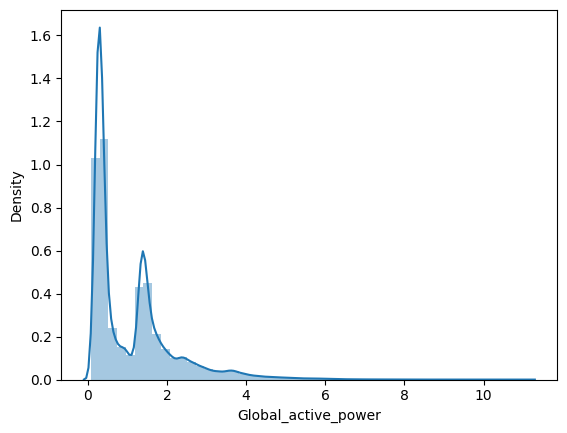

In [18]:
sns.distplot(dataset['Global_active_power'])

/tmp/ipython-input-19-4209798639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_active_power'],kde=False,bins=30)


<Axes: xlabel='Global_active_power'>

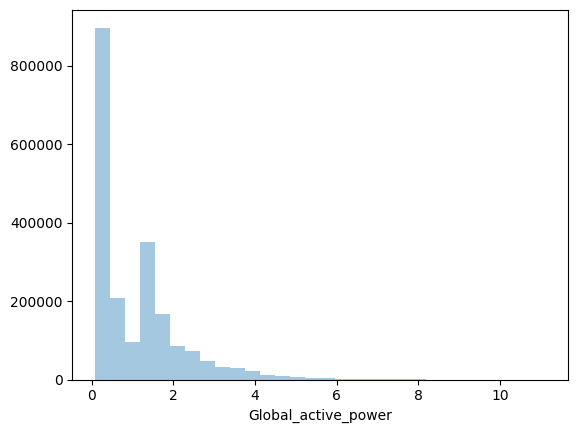

In [19]:
sns.distplot(dataset['Global_active_power'],kde=False,bins=30)

/tmp/ipython-input-20-1506481837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)


<Axes: xlabel='Global_reactive_power'>

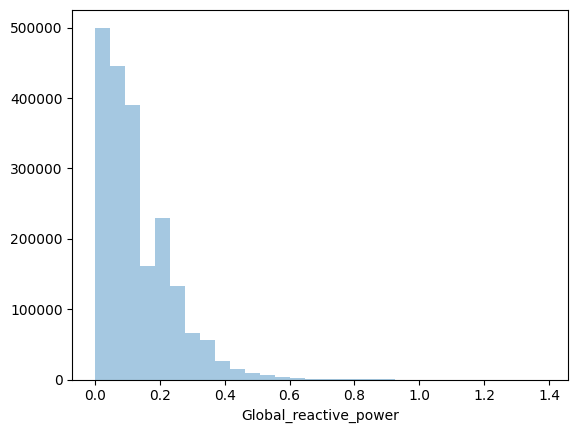

In [20]:
sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)

/tmp/ipython-input-21-666305061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Voltage'],kde=True,bins=30)


<Axes: xlabel='Voltage', ylabel='Density'>

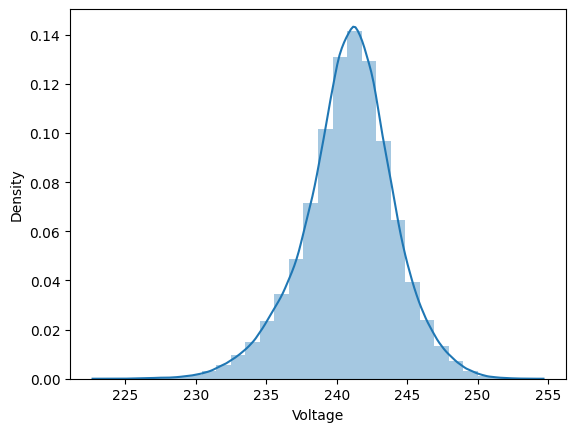

In [21]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

/tmp/ipython-input-22-1389982641.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_intensity'],kde=True,bins=30)


<Axes: xlabel='Global_intensity', ylabel='Density'>

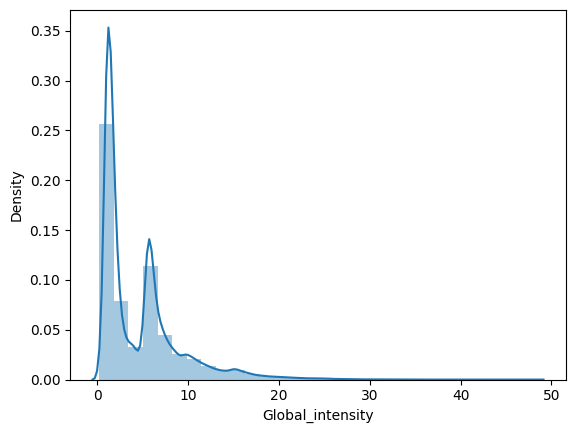

In [22]:
sns.distplot(dataset['Global_intensity'],kde=True,bins=30)

In [23]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


<Axes: >

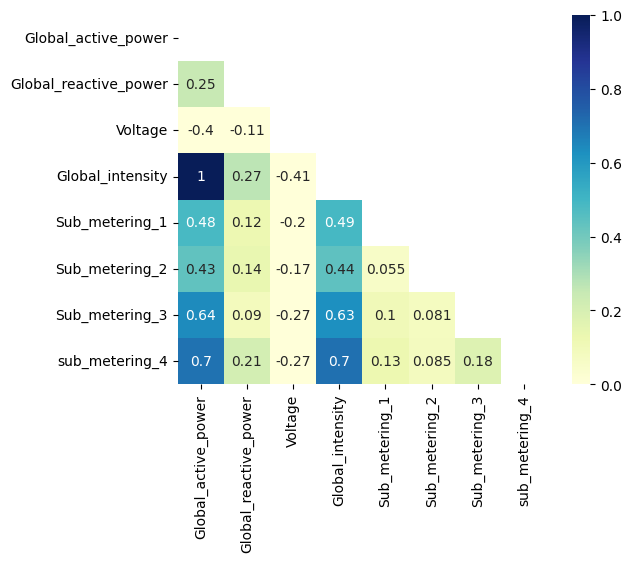

In [24]:
pearson=dataset.corr(method='pearson')
mask=np.zeros_like(pearson)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(pearson,vmax=1,vmin=0,square=True,cbar=True,annot=True,cmap='YlGnBu',mask=mask)

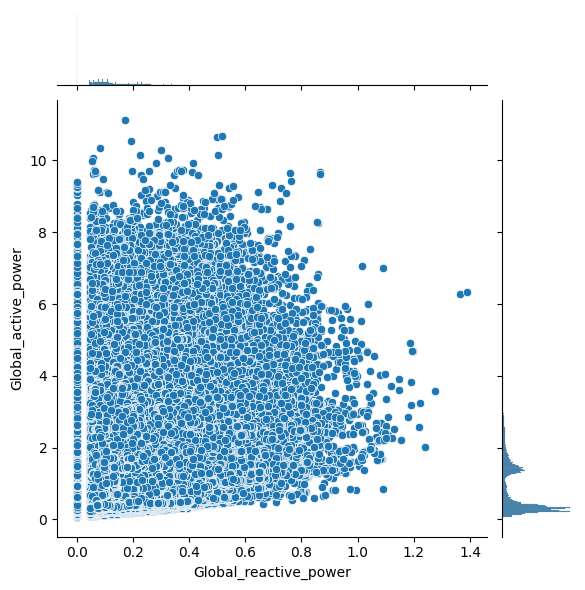

In [25]:
sns.jointplot(x='Global_reactive_power',y='Global_active_power',data=dataset,kind='scatter')

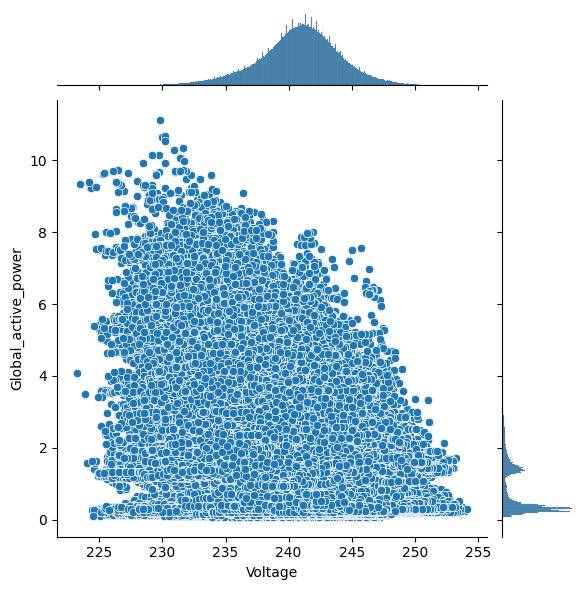

In [26]:
sns.jointplot(x='Voltage',y='Global_active_power',data=dataset,kind='scatter')

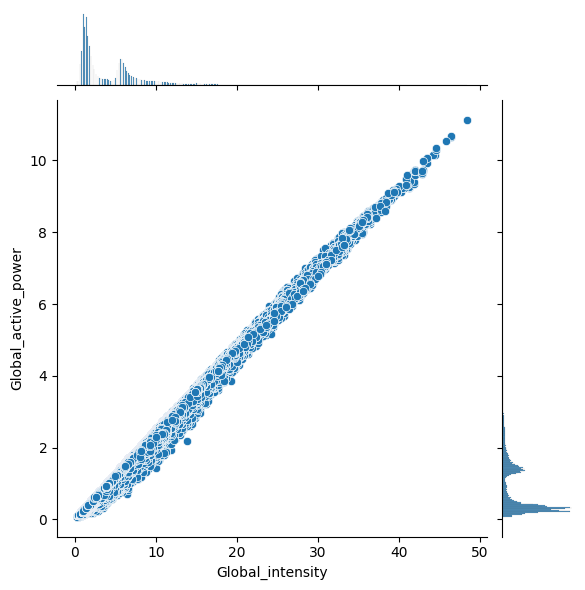

In [27]:
sns.jointplot(x='Global_intensity',y='Global_active_power',data=dataset,kind='scatter')

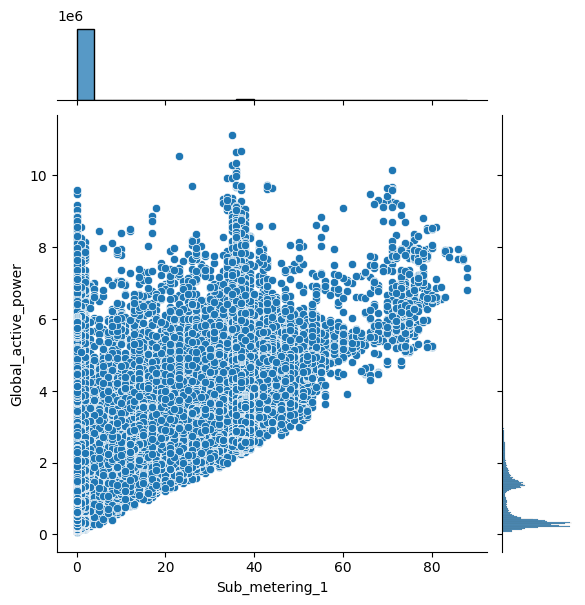

In [28]:
sns.jointplot(x='Sub_metering_1',y='Global_active_power',data=dataset,kind='scatter')

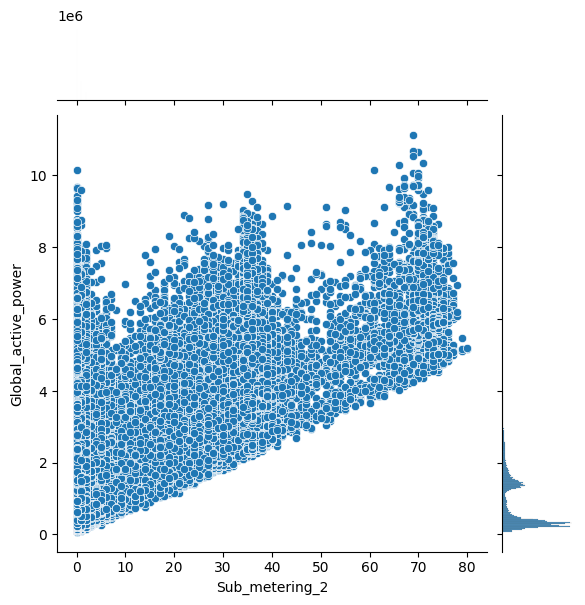

In [29]:
sns.jointplot(x='Sub_metering_2',y='Global_active_power',data=dataset,kind='scatter')

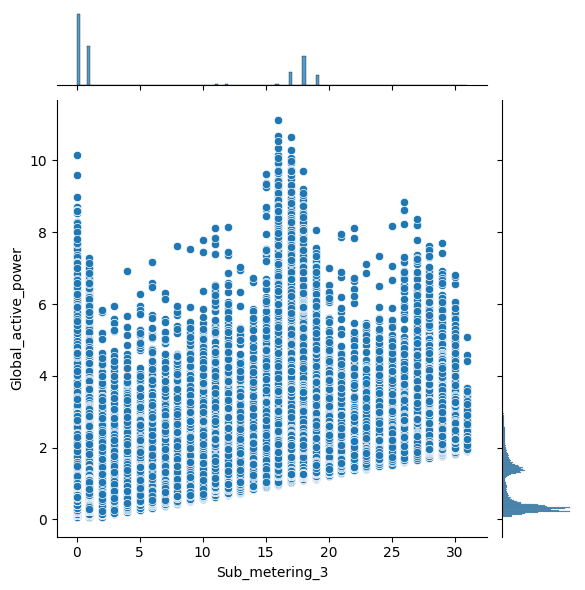

In [30]:
sns.jointplot(x='Sub_metering_3',y='Global_active_power',data=dataset,kind='scatter')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/root/.cache/kagglehub/datasets/uciml/electric-power-consumption-data-set/versions/1/household_power_consumption.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False)  # Replace with the actual file path

# Select features (excluding 'Global_active_power', 'Voltage', and 'sub_metering_4')
X = dataset.drop(['Global_active_power', 'Voltage', 'sub_metering_4'], axis=1)

# Target variable
y = dataset['Global_active_power']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1434496, 5)
(614784, 5)
(1434496,)
(614784,)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm=LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
predictions=lm.predict(X_test)

In [38]:
predictions

array([3.92903992, 0.68716386, 0.24165406, ..., 1.56079602, 0.57516828,
       1.54812955])

In [39]:
from sklearn import metrics

In [45]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R sqaures value:',metrics.r2_score(y_test,predictions))
r2 = metrics.r2_score(y_test, predictions)
print('R squared value (R²):', r2)
print('Model Accuracy (based on R² score):', round(r2 * 100, 2), '%')


MAE: 0.027455608456450082
MSE: 0.0018226463072696967
RMSE: 0.042692461949033776
R sqaures value: 0.9983631695586828
R squared value (R²): 0.9983631695586828
Model Accuracy (based on R² score): 99.84 %


In [ ]:
import pickle

In [ ]:
with open('model1.pkl','wb') as files:
  pickle.dump(lm,files)

In [ ]:
with open('model1.pkl','rb') as f:
  model=pickle.load(f)

In [ ]:
from google.colab import files
files.download('model1.pkl')